In [1]:
import pandas as pd
import numpy as np

df = pd.concat([
    pd.read_csv("data/alcoholic_features.csv"),
    pd.read_csv("data/control_features.csv")
])


In [2]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

def test_feature_significance(df, feature, alpha=0.05):
    group_a = df[df["group"] == "a"][feature]
    group_c = df[df["group"] == "c"][feature]

    # Check normality
    stat_a, p_a = shapiro(group_a)
    stat_c, p_c = shapiro(group_c)

    normal = p_a > alpha and p_c > alpha

    # Check variance
    stat_var, p_var = levene(group_a, group_c)

    if normal and p_var > alpha:
        test = ttest_ind(group_a, group_c)
        test_type = "t-test"
    else:
        test = mannwhitneyu(group_a, group_c)
        test_type = "Mann-Whitney U"

    return {
        "feature": feature,
        "test": test_type,
        "p_value": test.pvalue
    }


In [3]:
features = [col for col in df.columns if col not in ['subject', 'trial', 'sensor', 'group']]
results = [test_feature_significance(df, f) for f in features]
significant = [r for r in results if r['p_value'] < 0.05]


c:\Users\Uni\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [4]:
def cohens_d(x, y):
    return (np.mean(x) - np.mean(y)) / np.sqrt((np.std(x) ** 2 + np.std(y) ** 2) / 2)


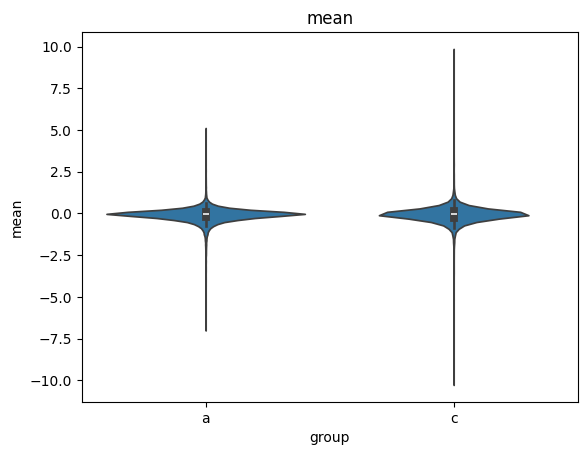

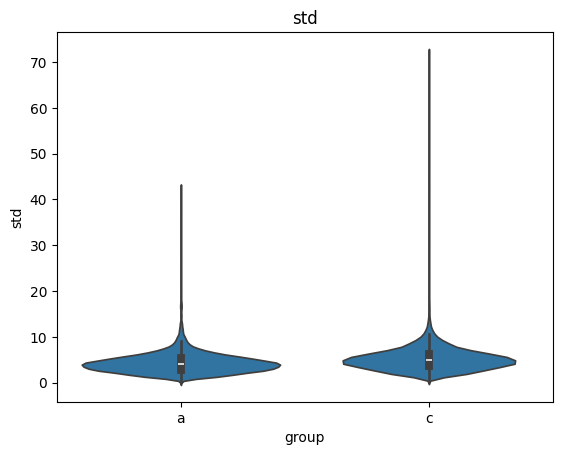

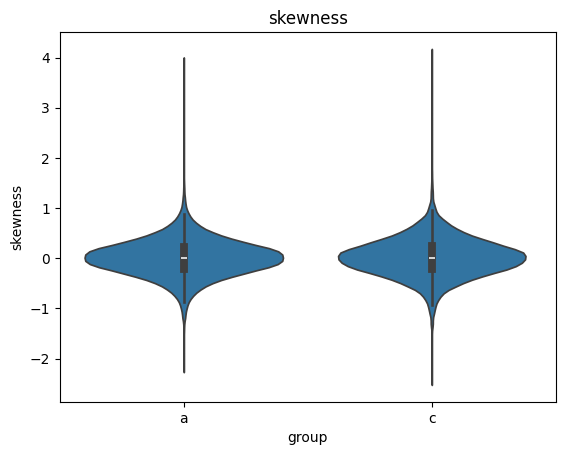

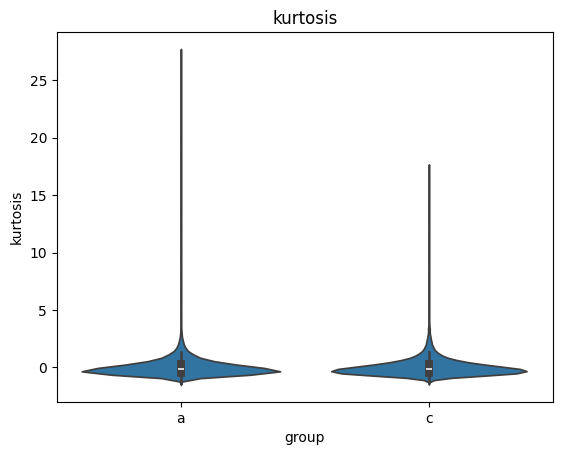

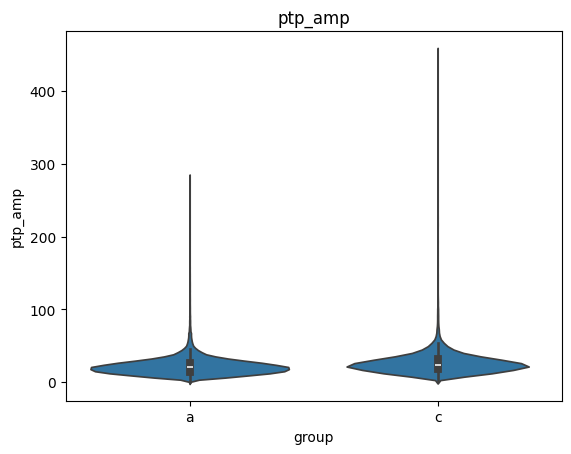

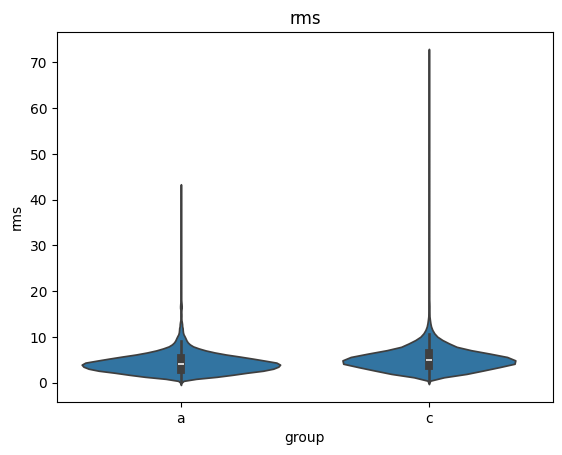

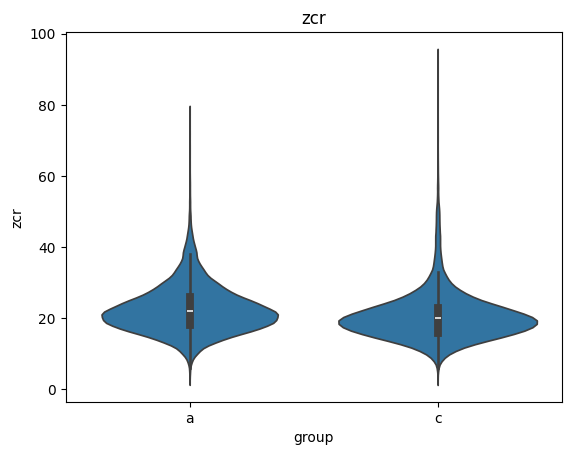

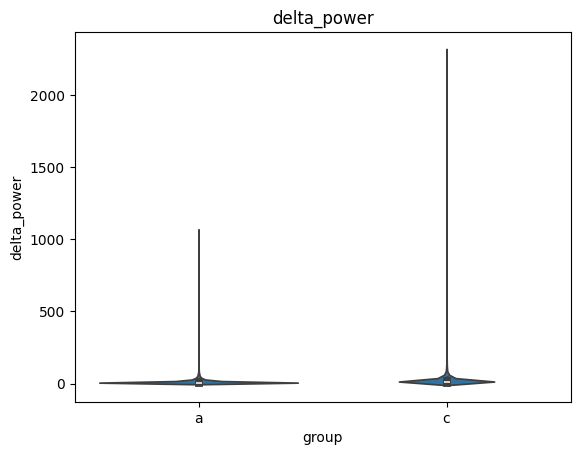

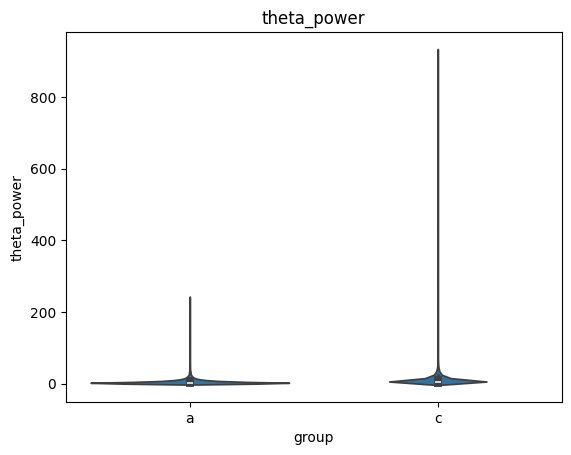

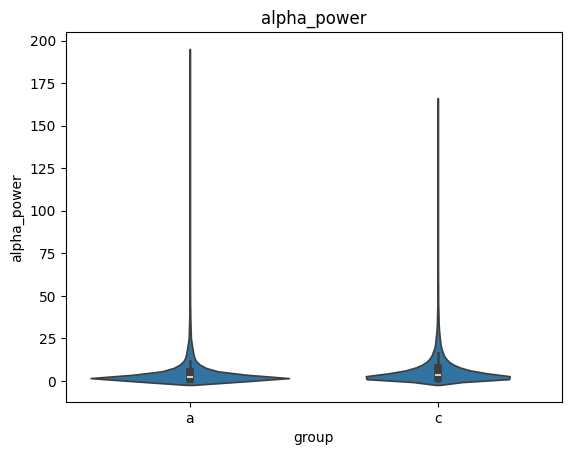

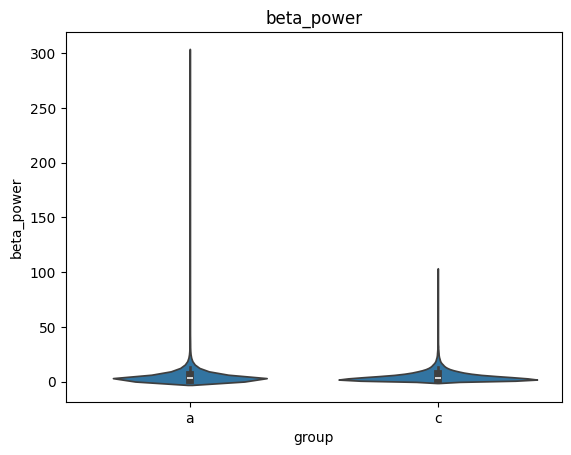

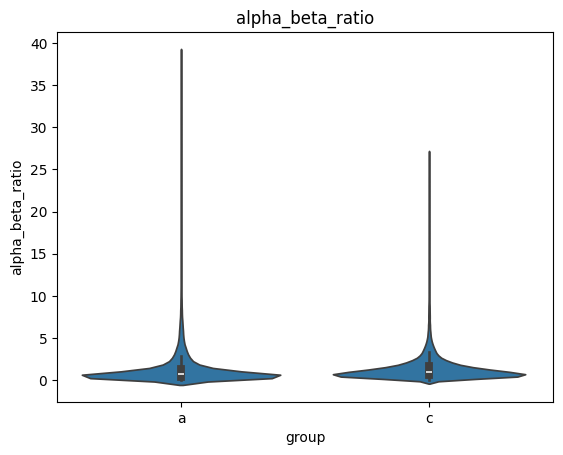

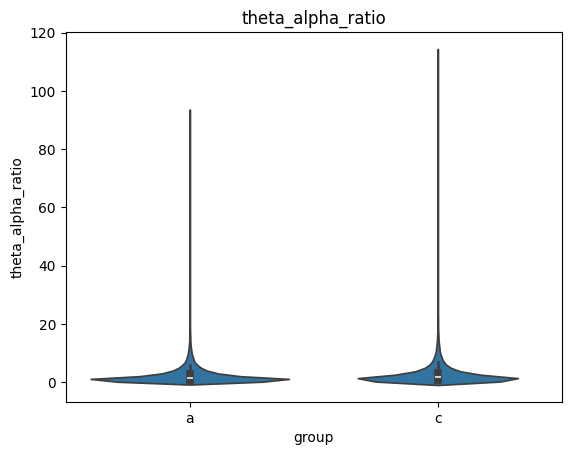

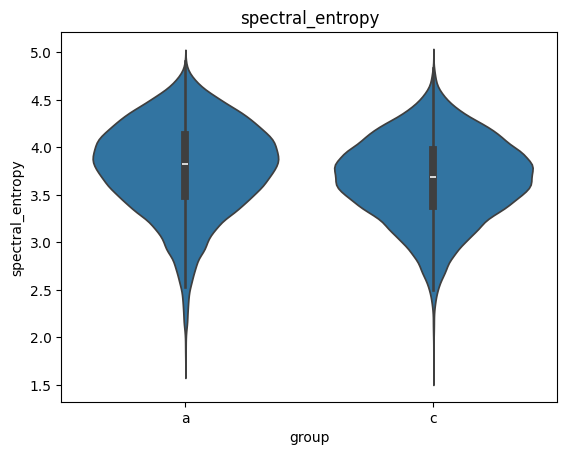

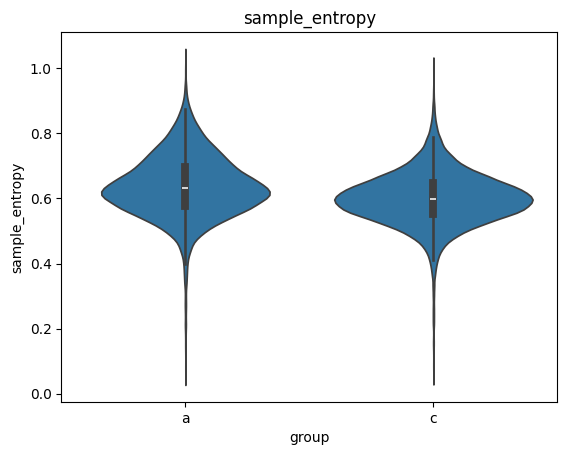

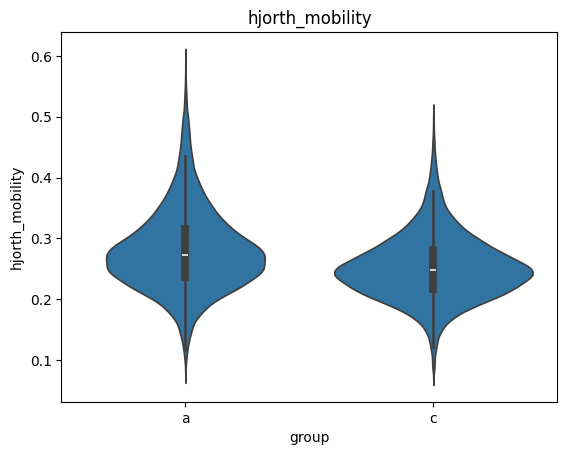

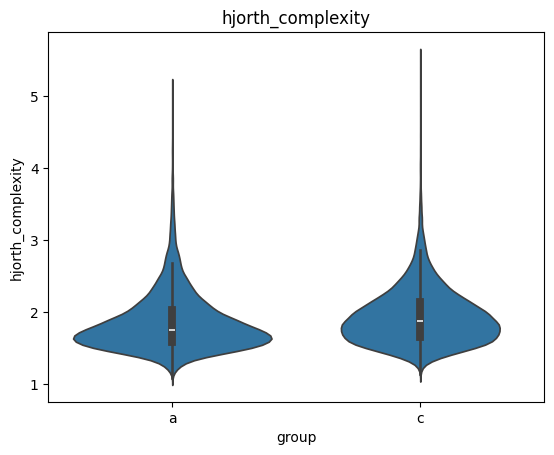

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

for f in features:
    sns.violinplot(x="group", y=f, data=df)
    plt.title(f)
    plt.show()


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df[features]
y = LabelEncoder().fit_transform(df["group"])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

model = RandomForestClassifier()
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print(importances)


theta_power          0.086268
alpha_beta_ratio     0.071684
hjorth_mobility      0.070063
delta_power          0.069538
sample_entropy       0.068019
hjorth_complexity    0.066366
mean                 0.061002
theta_alpha_ratio    0.056621
spectral_entropy     0.054850
skewness             0.054202
kurtosis             0.052282
alpha_power          0.052194
beta_power           0.051834
rms                  0.049562
ptp_amp              0.048854
std                  0.048642
zcr                  0.038019
dtype: float64


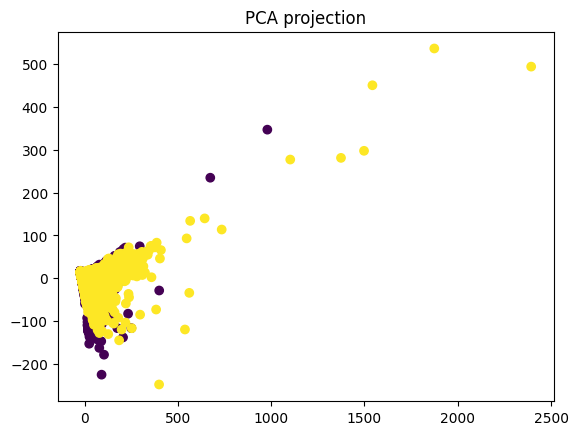

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
proj = pca.fit_transform(X)

plt.scatter(proj[:, 0], proj[:, 1], c=y)
plt.title("PCA projection")
plt.show()


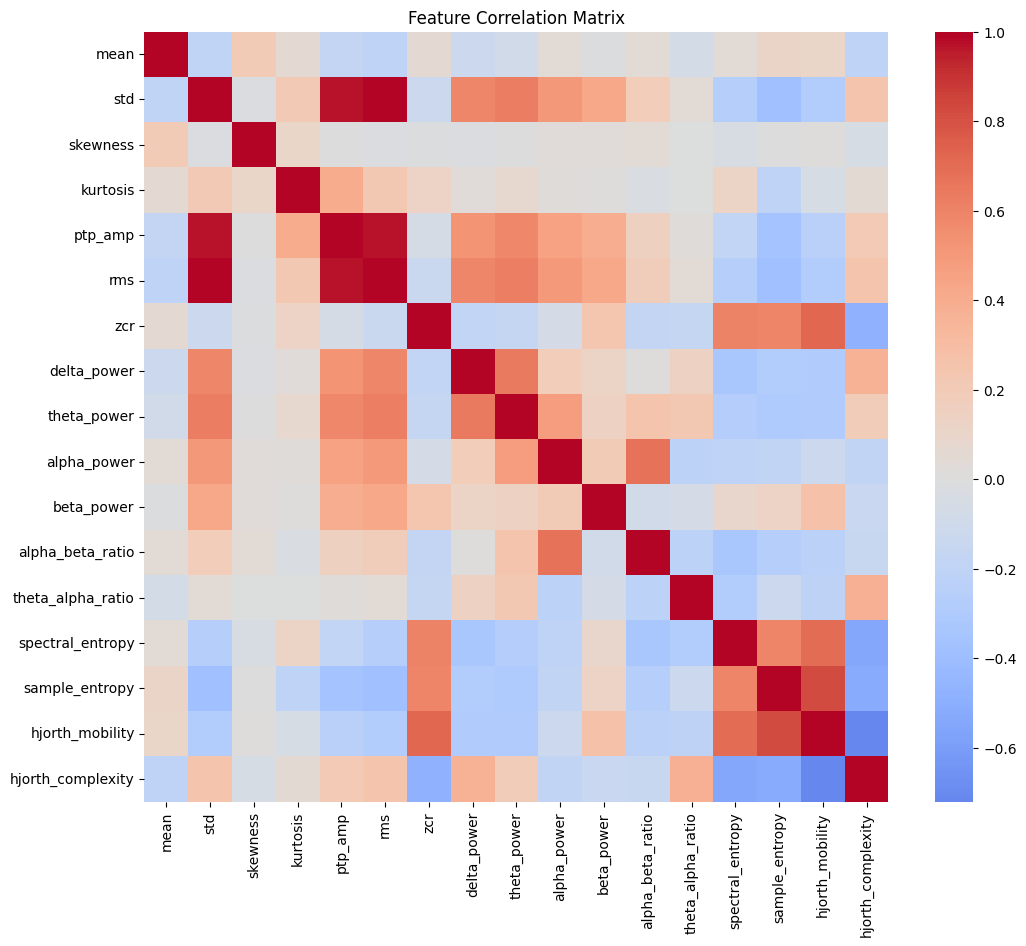

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()


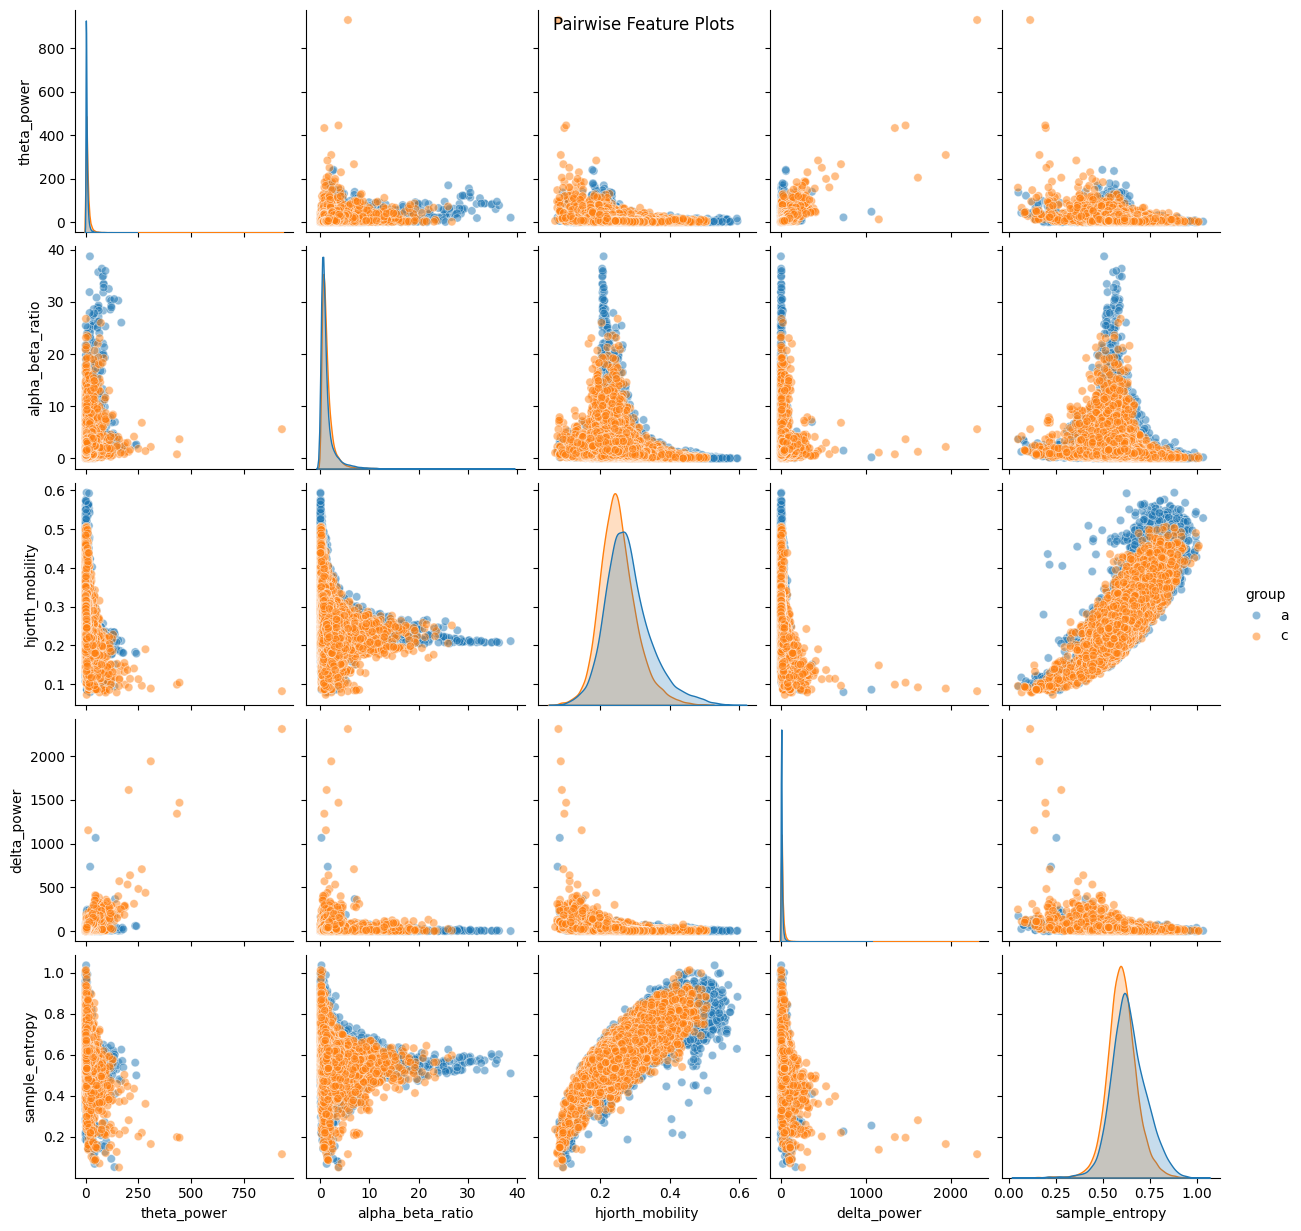

In [11]:
import seaborn as sns
top_features = importances.sort_values(ascending=False).head(5).index.tolist()

sns.pairplot(df, vars=top_features, hue="group", plot_kws={"alpha": 0.5})
plt.suptitle("Pairwise Feature Plots")
plt.show()


In [12]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(df[features], df["group"])
mi_series = pd.Series(mi_scores, index=features).sort_values(ascending=False)
print(mi_series)


theta_power          0.037086
hjorth_mobility      0.030602
sample_entropy       0.027533
delta_power          0.026379
std                  0.024534
alpha_beta_ratio     0.022653
rms                  0.021886
zcr                  0.020045
ptp_amp              0.017353
alpha_power          0.016738
hjorth_complexity    0.016631
spectral_entropy     0.014525
beta_power           0.009387
skewness             0.002959
mean                 0.001941
theta_alpha_ratio    0.000400
kurtosis             0.000078
dtype: float64


In [13]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
rfe.fit(df[features], df["group"])

selected = pd.Series(rfe.support_, index=features)
print("Selected features:")
print(selected[selected == True].index.tolist())


Selected features:
['mean', 'std', 'delta_power', 'theta_power', 'alpha_beta_ratio', 'theta_alpha_ratio', 'spectral_entropy', 'sample_entropy', 'hjorth_mobility', 'hjorth_complexity']


In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(df[features])
feature_names = poly.get_feature_names_out(features)


In [15]:
print("Polynomial features:")
for name in feature_names:
    print(name)

Polynomial features:
mean
std
skewness
kurtosis
ptp_amp
rms
zcr
delta_power
theta_power
alpha_power
beta_power
alpha_beta_ratio
theta_alpha_ratio
spectral_entropy
sample_entropy
hjorth_mobility
hjorth_complexity
mean std
mean skewness
mean kurtosis
mean ptp_amp
mean rms
mean zcr
mean delta_power
mean theta_power
mean alpha_power
mean beta_power
mean alpha_beta_ratio
mean theta_alpha_ratio
mean spectral_entropy
mean sample_entropy
mean hjorth_mobility
mean hjorth_complexity
std skewness
std kurtosis
std ptp_amp
std rms
std zcr
std delta_power
std theta_power
std alpha_power
std beta_power
std alpha_beta_ratio
std theta_alpha_ratio
std spectral_entropy
std sample_entropy
std hjorth_mobility
std hjorth_complexity
skewness kurtosis
skewness ptp_amp
skewness rms
skewness zcr
skewness delta_power
skewness theta_power
skewness alpha_power
skewness beta_power
skewness alpha_beta_ratio
skewness theta_alpha_ratio
skewness spectral_entropy
skewness sample_entropy
skewness hjorth_mobility
skewness